### Notebook for the cell proportion analysis of Healthy_vs_COPD CTRL_vs_IAV data

- **Developed by**: Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231204
- **Last modified**: 231204

### Load required packages

In [1]:
import milopy
import numpy as np
import pandas as pd
import scanpy as sc
import pertpy as pt
import milopy.core as milo
import matplotlib.pyplot as plt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                 10.1.0
absl                NA
adjustText          0.8
aiohttp             3.9.1
aiosignal           1.3.1
annotated_types     0.6.0
anyio               NA
appnope             0.1.3
arrow               1.3.0
arviz               0.16.1
asttokens           NA
async_timeout       4.0.3
attr                23.1.0
backoff             2.2.1
bs4                 4.12.2
certifi             2023.11.17
cffi                1.16.0
chardet             5.2.0
charset_normalizer  3.3.2
chex                0.1.7
click               8.1.7
comm                0.2.0
contextlib2         NA
croniter            NA
custom_inherit      2.4.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.0
decorator           5.1.1
decoupler           1.5.0
deepdiff            6.7.1
docrep              0.3.2
ete3                3.1.3
etils               1.5.2
exceptiongroup      1.2.0
executing           2.0.

### Load working object

In [3]:
adata = sc.read_h5ad('../../../data/Marburg_cell_states_locked_ctl231212.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'viral_counts', 'infected_status'
    var: 'mt', 'ribo'
    uns: 'cell_states_colors', 'disease_colors', 'group_colors', 'infected_status_colors', 'infection_colors'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

### Test for differential abundance with `milo`

In [4]:
sc.pp.neighbors(adata, n_neighbors = 50, random_state = 1712, use_rep = 'X_scANVI')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)


In [5]:
milo.make_nhoods(adata)
milo.count_nhoods(adata, sample_col = "batch")
milo.DA_nhoods(adata, design = "~ group")

In [6]:
milo_results = adata.uns["nhood_adata"].obs
milo_results

,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,9737154-CSE_06_CRTL-V2-uninfected,1.831161,0.145729,7.648268,0.015971,0.899633,0.939376,0.940035
1,4595019-CSE_06_CRTL-V2-uninfected,2.130541,0.277720,7.346215,0.059454,0.807752,0.876702,0.878018
2,12113756-CSE_06_CRTL-V2-uninfected,1.822583,0.965106,7.268969,0.747806,0.388791,0.534845,0.537920
3,12541494-CSE_06_CRTL-V2-uninfected,1.793364,0.372754,7.312514,0.104325,0.747253,0.833662,0.834972
4,10046995-CSE_06_CRTL-V2-uninfected,1.821095,0.684735,7.614103,0.336186,0.563101,0.689698,0.691946
...,...,...,...,...,...,...,...,...
7535,9020180-CSE03_IAV-V6-infected,2.200487,3.157238,7.487710,5.541667,0.020157,0.061708,0.063855
7536,14041734-CSE03_IAV-V6-infected,2.086828,2.838565,7.796090,4.788370,0.030469,0.083451,0.085959
7537,9026745-CSE03_IAV-V6-infected,2.531824,5.001407,7.599756,12.872586,0.000480,0.004895,0.005235
7538,1631627-CSE03_IAV-V6-infected,2.418929,4.391495,7.797231,10.154655,0.001809,0.010870,0.011520


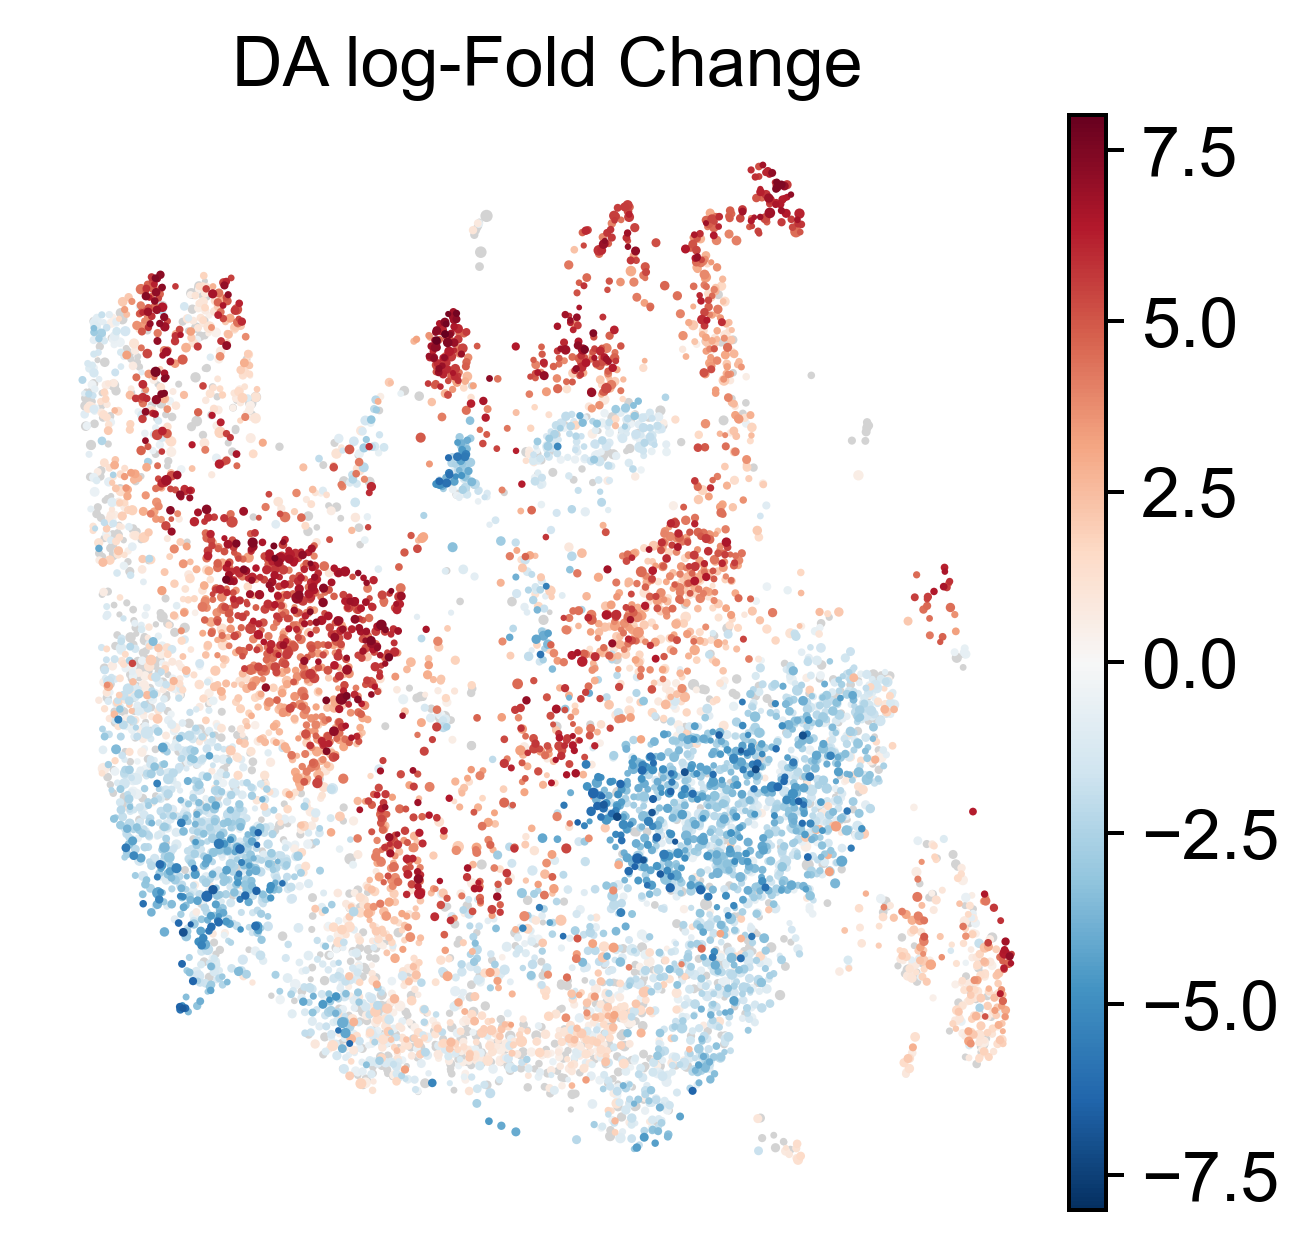

In [7]:
milopy.utils.build_nhood_graph(adata)
milopy.plot.plot_nhood_graph(adata, alpha = 0.8, min_size = 0.1)

In [8]:
milopy.utils.annotate_nhoods(adata, anno_col = 'cell_compartment')

Text(0.5, 0, 'celltype fraction')

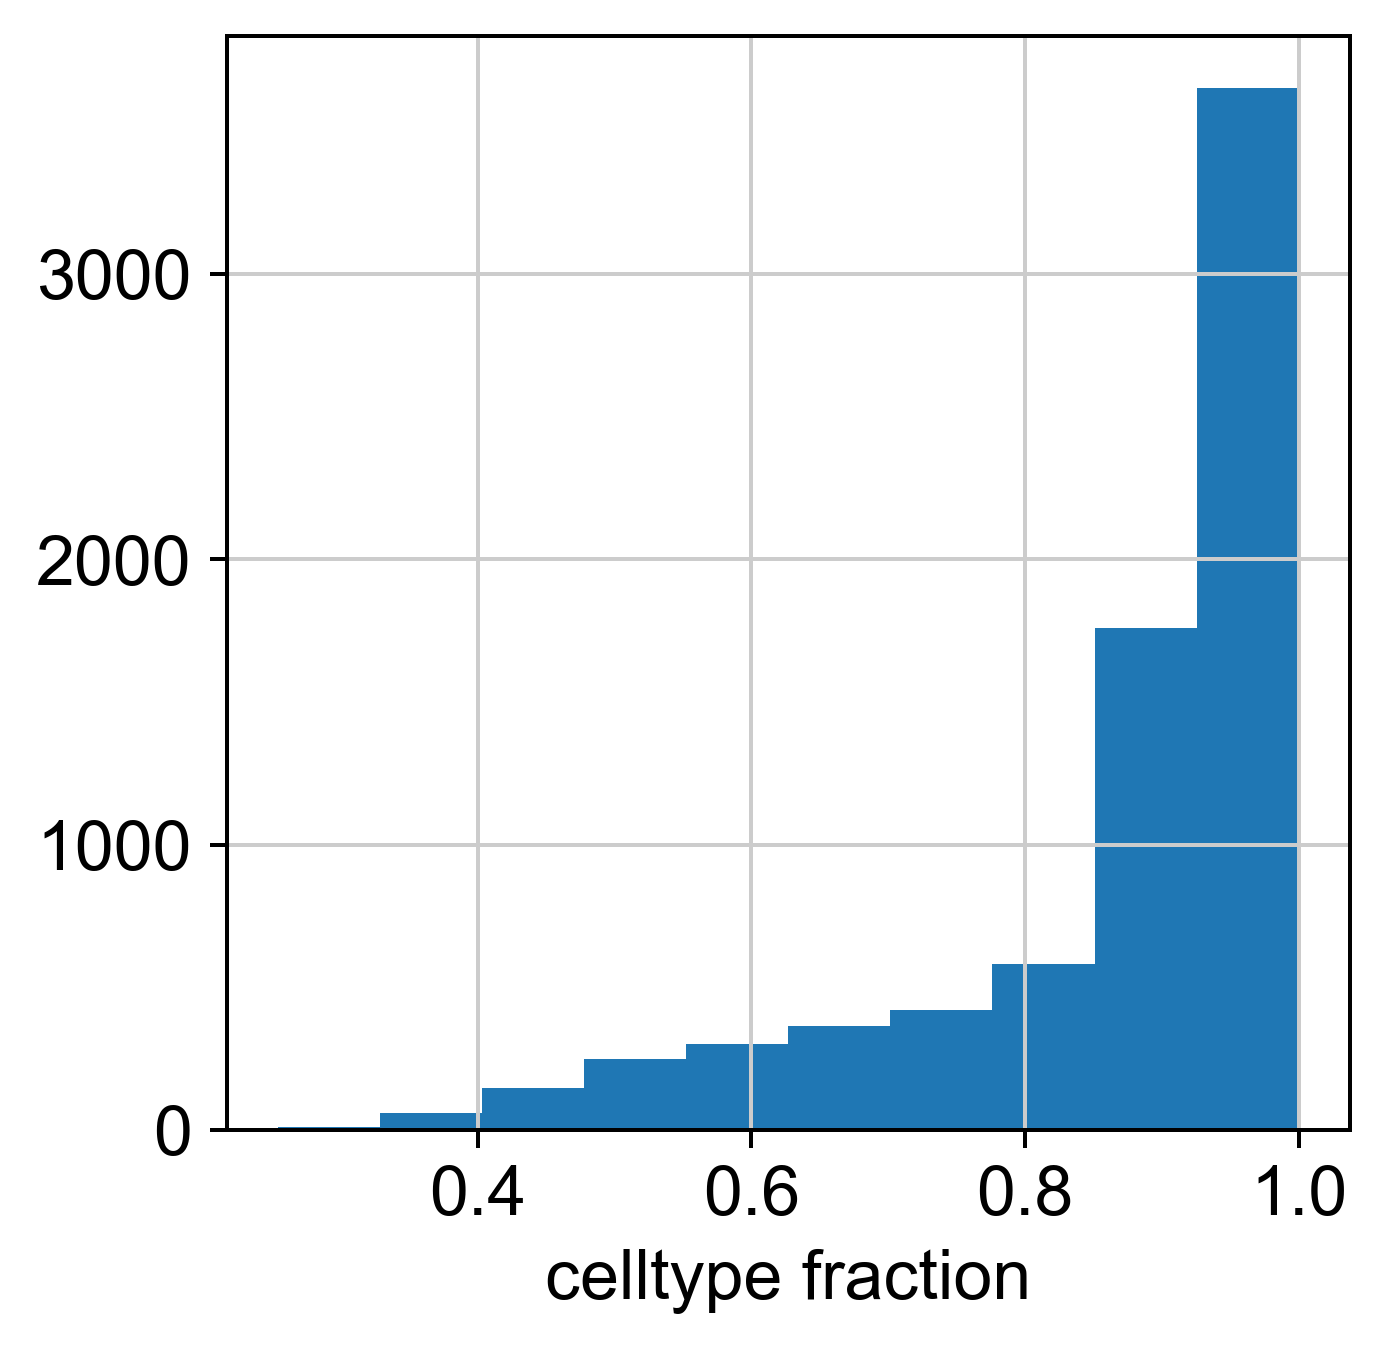

In [9]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"])
plt.xlabel("celltype fraction")

In [10]:
nhood_annotation = adata.uns['nhood_adata'].obs['nhood_annotation']
nhood_annotation = nhood_annotation.cat.add_categories(['Ambiguous'])
adata.uns['nhood_adata'].obs['nhood_annotation'] = nhood_annotation

adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.6, "nhood_annotation"] = "Ambiguous"


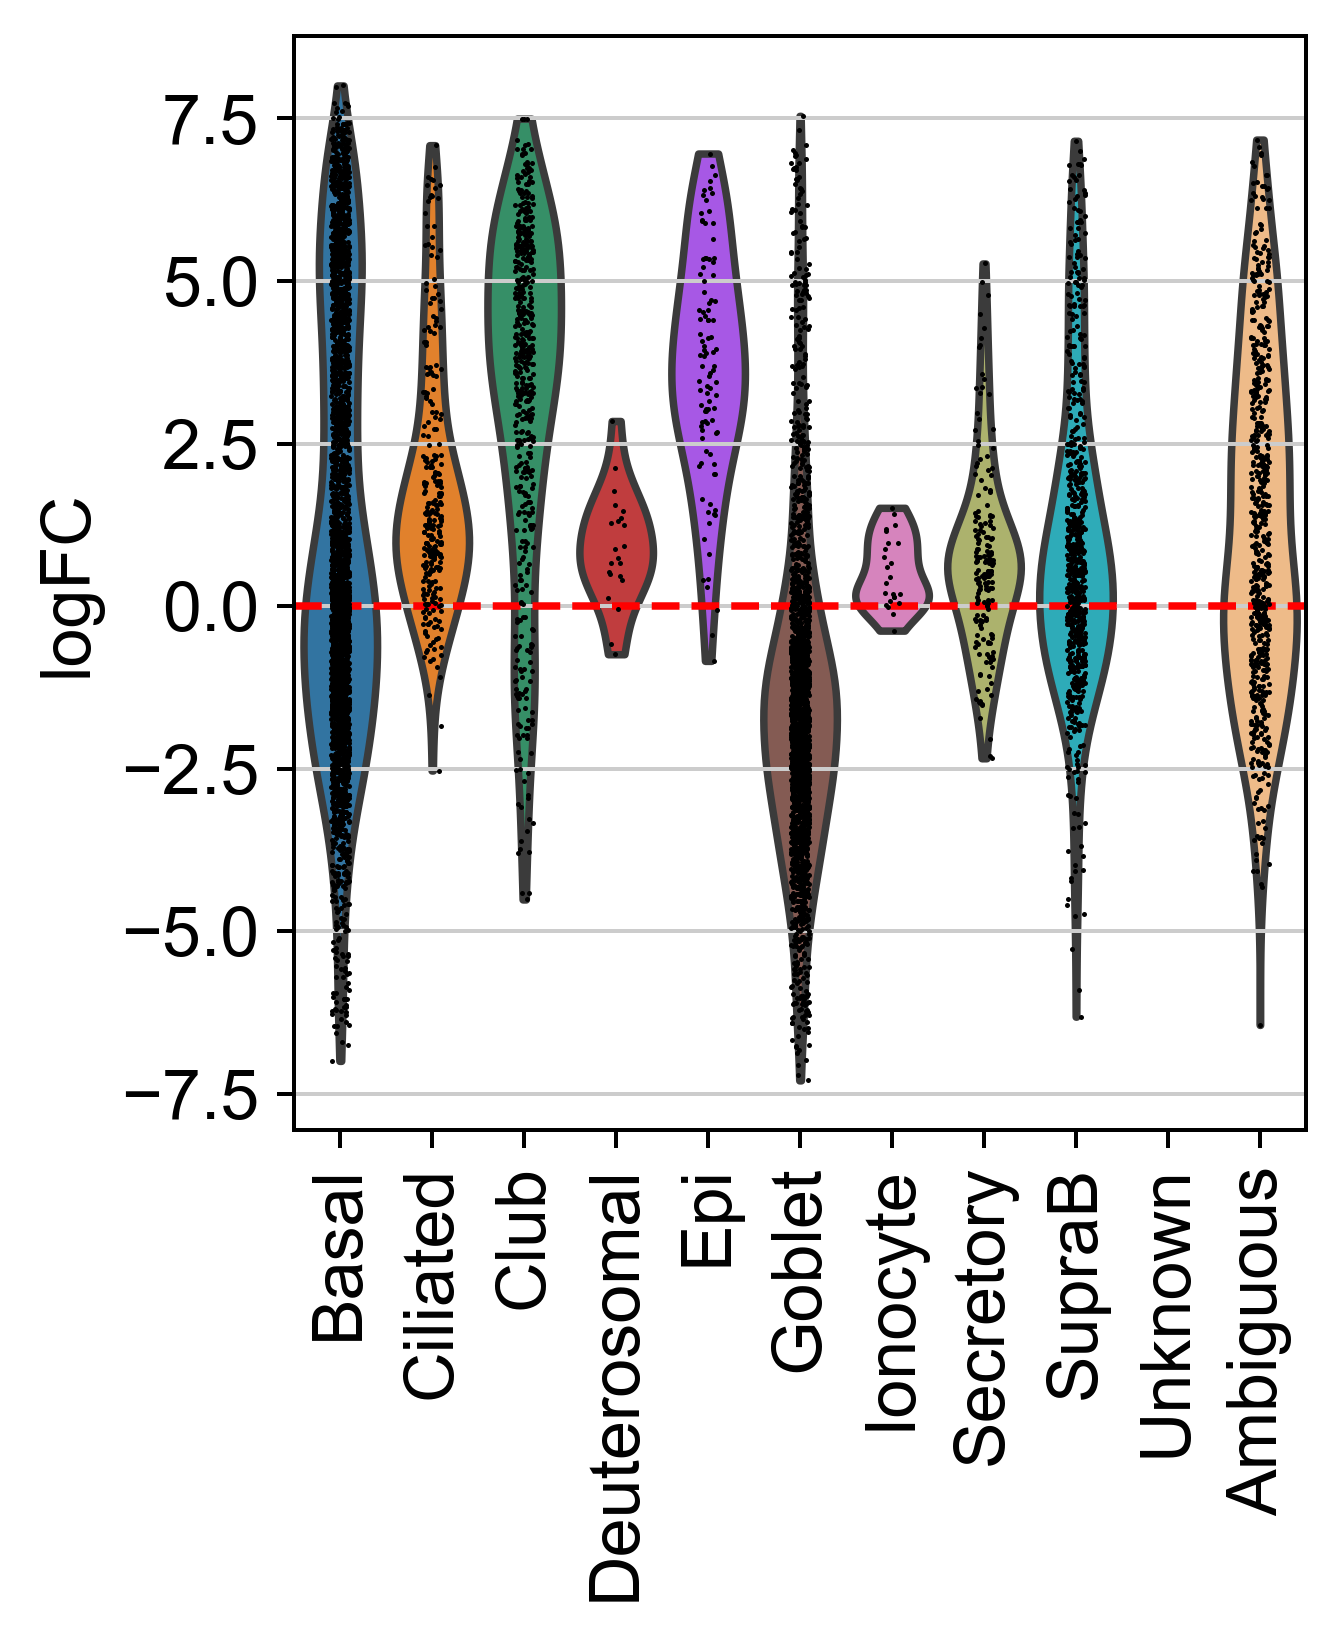

<Figure size 1440x3600 with 0 Axes>

In [19]:
sc.pl.violin(adata.uns['nhood_adata'], "logFC", groupby = "nhood_annotation", rotation = 90, show = False)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.show()

In [21]:
%%R
milo <- buildNhoodGraph(milo)

UsageError: Cell magic `%%R` not found.


In [ ]:
sc.pl.umap(adata, color = ['group'], frameon = False, )